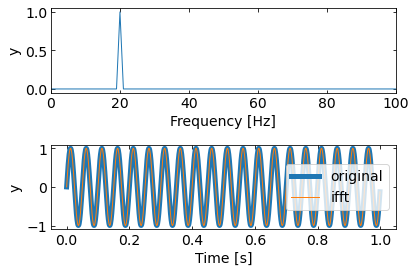

In [2]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
 
# FFTをする関数
def fft_ave(data, samplerate, Fs):
    fft = fftpack.fft(data)                      # FFT（実部と虚部）
    fft_amp = np.abs(fft / (Fs / 2))             # 振幅成分を計算
    fft_axis = np.linspace(0, samplerate, Fs)    # 周波数軸を作成
    return fft, fft_amp, fft_axis
 
# サンプルの時間領域信号を生成
dt = 0.001
t = np.arange(0, 1, dt)
wave = np.sin(2 * np.pi * 20 * t)
 
# FFTとIFFT処理
fft, fft_amp, fft_axis = fft_ave(wave, 1 / dt, len(wave))
ifft_time = fftpack.ifft(fft)
 
# ここからグラフ描画
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
 
# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
 
# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax2 = fig.add_subplot(212)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
 
# 軸のラベルを設定する。
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('y')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('y')
 
# データの範囲と刻み目盛を明示する。
ax1.set_xticks(np.arange(0, 1 / dt, 20))
ax1.set_yticks(np.arange(0, 3, 0.5))
ax1.set_xlim(0, 100)
 
# データプロットの準備とともに、ラベルと線の太さ、凡例の設置を行う。
ax1.plot(fft_axis, fft_amp, label='signal', lw=1)
ax2.plot(t, wave, label='original', lw=5)
ax2.plot(t, ifft_time.real, label='ifft', lw=1)
 
fig.tight_layout()
plt.legend()
 
# グラフを表示する。
plt.show()
plt.close()